<a href="https://colab.research.google.com/github/bkim2210/Google_Analytics_Project/blob/master/Google_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,scipy, seaborn as sns
from importlib import reload
from importlib import reload
plt=reload(plt)



In [ ]:
df = pd.read_csv('/job_skills.csv')
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [ ]:
df.columns

Index(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum Qualifications', 'Preferred Qualifications'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [ ]:
pd.isnull(df).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [ ]:
df = df.dropna(how='any',axis='rows')

In [ ]:
df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1235,1235,1235,1235,1235,1235,1235
unique,2,779,23,91,801,806,820
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1212,35,168,187,33,32,32


In [ ]:
df.Company.value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

In [ ]:
df.Title.value_counts()[:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
Partner Sales Engineer, Google Cloud           7
User Experience Design Intern, Summer 2018     7
Recruiter                                      7
Name: Title, dtype: int64

In [ ]:
df.Category.value_counts()


Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 100
Business Strategy                    98
People Operations                    86
User Experience & Design             84
Program Management                   72
Partnerships                         59
Product & Customer Support           50
Legal & Government Relations         46
Administrative                       40
Sales Operations                     31
Real Estate & Workplace Services     25
Software Engineering                 24
Hardware Engineering                 22
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
IT & Data Management                  5
Technical Writing                     5
Developer Relations                   5
Data Center & Network                 2
Name: Category, dtype: int64

In [ ]:
df['Country']=df['Location'].apply(lambda x : x.split(',')[-1])

In [ ]:
df.Country.value_counts()[:10]


 United States     624
 Ireland            87
 United Kingdom     62
 Germany            53
Singapore           41
 China              38
 Australia          35
 Japan              31
 Taiwan             30
 India              28
Name: Country, dtype: int64

In [ ]:
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english')) 

df['Responsibilities'] = df.Responsibilities.apply(lambda x: word_tokenize(x))
df['Responsibilities'] = df.Responsibilities.apply(lambda x: [w for w in x if w not in stop_words])
df['Responsibilities'] = df.Responsibilities.apply(lambda x: ' '.join(x))

df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: word_tokenize(x))
df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: [w for w in x if w not in stop_words])
df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: ' '.join(x))

df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: word_tokenize(x))
df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: [w for w in x if w not in stop_words])
df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: ' '.join(x))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
df['Minimum_years_experience'] = df['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))

df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda y : [0] if len(y)==0 else y)

df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda z : max(z))
df['Minimum_years_experience'] = df.Minimum_years_experience.astype(int)

In [ ]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape , shepherd , ship , show technical progr...",BA/BS degree equivalent practical experience ....,Experience business technology market program ...,Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities supply chain...,BS degree Engineering discipline equivalent pr...,"BSEE , BSME BSIE degree . Experience using Sta...",China,7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect analyze data draw insight identify str...,"Bachelor ’ degree Business , Economics , Stati...",Experience partnering consulting cross-functio...,United States,2
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one top Android , iOS , web engine...",BA/BS degree Computer Science equivalent pract...,"Experience software developer , architect , te...",United States,0
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements internal customers . Provide...,BA/BS degree equivalent practical experience ....,CTS Certification . Experience construction se...,United States,4


In [ ]:
df.Minimum_years_experience.describe()

count    1235.000000
mean        2.875304
std         3.299820
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        15.000000
Name: Minimum_years_experience, dtype: float64

In [ ]:
Degree = ['BA','BS','Bachelor','MBA','Master','PhD']

Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 908, 'BS': 878, 'Bachelor': 164, 'MBA': 71, 'Master': 81, 'PhD': 8}


In [ ]:
degree_requirement = sorted(Degrees.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree_requirement,columns=['Degree','Count'])
degree['Count'] = degree.Count.astype('int')
degree

,Degree,Count
0,BA,908
1,BS,878
2,Bachelor,164
3,Master,81
4,MBA,71
5,PhD,8


Text(0, 0.5, 'Count')

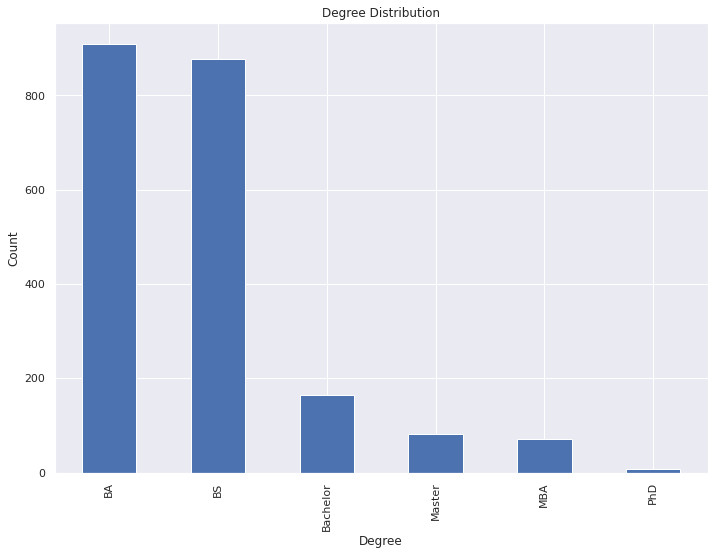

In [ ]:
degree.plot.bar(x='Degree',y='Count',legend=False)

plt.title('Degree Distribution')
plt.ylabel('Count')

Text(0, 0.5, 'Years')

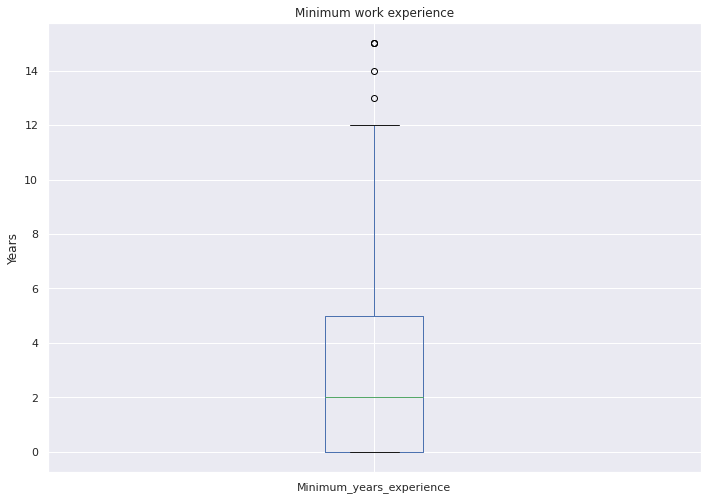

In [ ]:
df.Minimum_years_experience.plot(kind='box')
plt.title('Minimum work experience')
plt.ylabel('Years')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Minimum work experience')

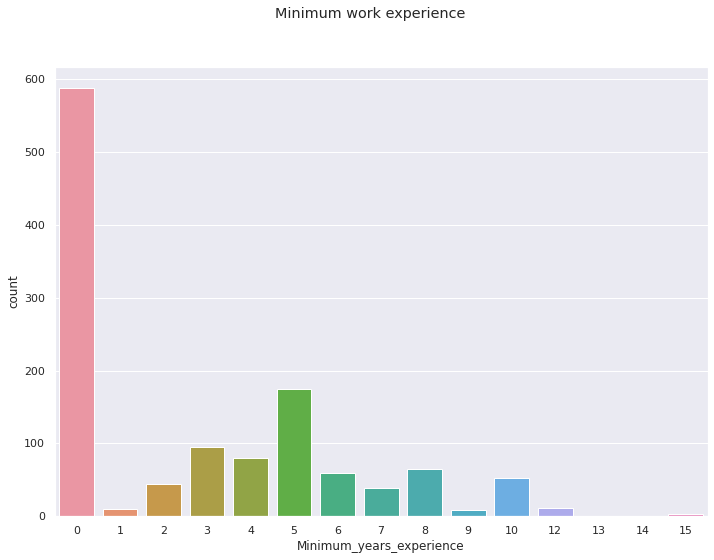

In [ ]:
sns.countplot('Minimum_years_experience',data=df)
plt.suptitle('Minimum work experience')

In [ ]:
Programming_Languages = ['Python', 'Java ','C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL','Go ']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 96, 'Java ': 71, 'C#': 0, 'PHP': 7, 'Javascript': 3, 'Ruby': 14, 'Perl': 6, 'SQL': 75, 'Go ': 26}


In [ ]:
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
language

,Language,Count
0,Python,96
1,SQL,75
2,Java,71
3,Go,26
4,Ruby,14
5,PHP,7
6,Perl,6
7,Javascript,3
8,C#,0


Text(0, 0.5, 'Count')

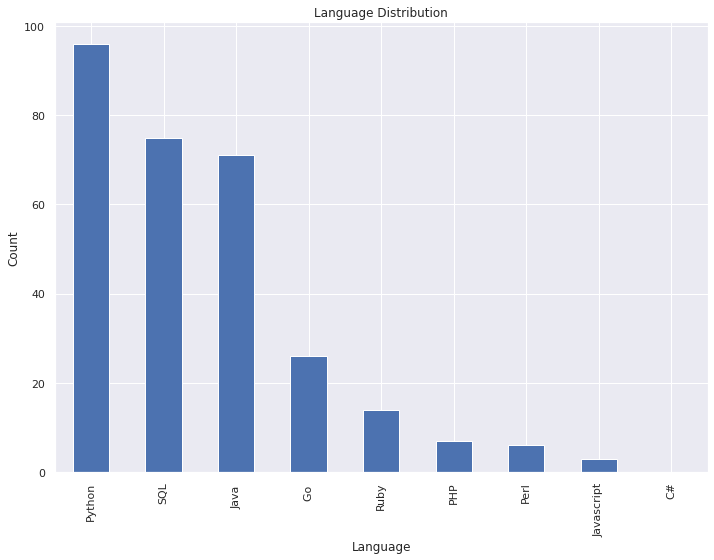

In [ ]:
language.plot.bar(x='Language',y='Count',legend=False)

plt.title('Language Distribution')
plt.ylabel('Count')

Analyst Based Roles

In [ ]:
df_Analyst = df.loc[df.Title.str.contains('Analyst').fillna(False)]

In [ ]:
df_Analyst

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect analyze data draw insight identify str...,"Bachelor ’ degree Business , Economics , Stati...",Experience partnering consulting cross-functio...,United States,2
10,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build maintain Support Operations Analytics in...,"BA/BS degree Computer Science , Engineering , ...",Experience designing executing structured anal...,United States,4
20,Google,"Quantitative Analyst, Ads Quality",Product & Customer Support,"Zürich, Switzerland",Apply advanced statistical methods work large ...,"PhD Statistics Econometrics related field , eq...",Relevant industry research experience . Famili...,Switzerland,0
85,Google,"Quantitative Analyst Lead, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Partner cross-functional stakeholders achieve ...,"PhD degree Statistics , Econometrics , related...",Relevant extensive PhD research work experienc...,Switzerland,0
182,Google,"Quantitative Analyst, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Work data sets solve non-routine analytical ch...,Master 's degree quantitative discipline equiv...,PhD quantitative discipline . Experience codin...,Switzerland,0
...,...,...,...,...,...,...,...,...,...
1128,Google,"People Analyst, Reporting and Insights",People Operations,"New York, NY, United States",Build strong relationships collaborate teammat...,"BA/BS degree Economics , Statistics , Finance ...",Experience collaborating projects involving mu...,United States,0
1177,Google,People Operations Business Intelligence Analyst,People Operations,"Mountain View, CA, United States",Maintain internal reporting platforms includin...,"Bachelor 's degree Engineering , Computer Scie...","1 year experience Data Warehousing , Business ...",United States,0
1196,Google,"Analyst, Staffing and Operations",People Operations,"Mountain View, CA, United States","Structure perform analysis independently , con...","BA/BS degree Mathematics , Business Administra...",Experience management consulting business stra...,United States,2
1218,Google,Compensation Analyst,People Operations,"Mountain View, CA, United States",Build robust data models analysis leading comp...,"BA/BS degree Economics , Psychology , Statisti...","Proficiency SQL , R , and/or spreadsheet softw...",United States,3


In [ ]:
Res_AN = ' '.join(df_Analyst['Responsibilities'].tolist())

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

G = np.array(Image.open('/google-logo-computer-icons-google-logo-png-favpng-L2nAPFg47JP3AjaAdiTk7pfiT.jpg'))

In [ ]:
def MadeWordCloud(title,text):
    df_subset = df.loc[df.Title.str.contains(title).fillna(False)]
    long_text = ' '.join(df_subset[text].tolist())
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    wordcloud = WordCloud(mask=G,background_color="white").generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(text,size=24)
    plt.show()

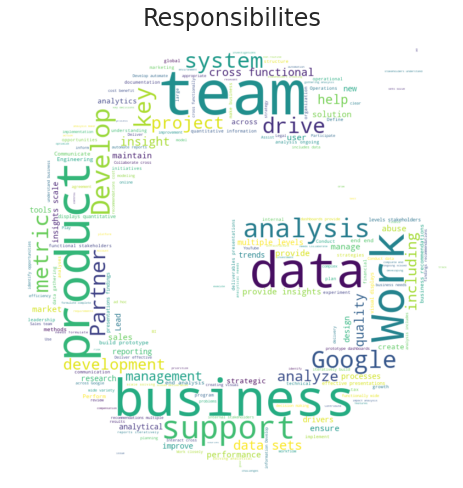

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()


{' R': 17, 'Python': 13, 'SQL': 29, 'SAS': 12}


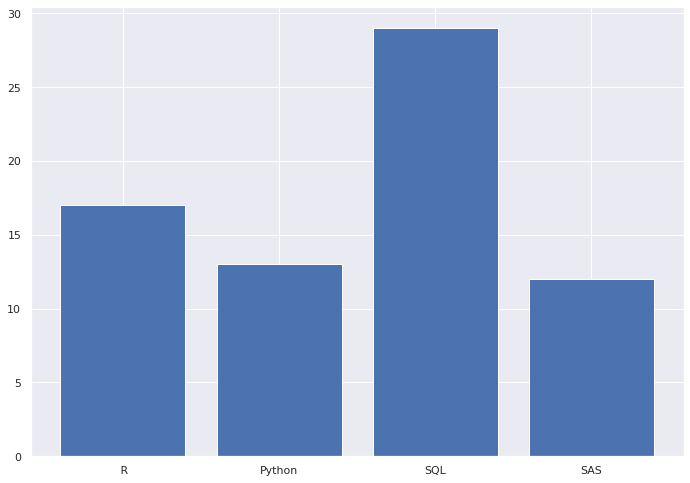

In [ ]:
DataSkill = [' R','Python','SQL','SAS']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
print(DataSkills)        
names = list(DataSkills.keys())
values = list(DataSkills.values())
plt.bar(range(len(DataSkills)), values, tick_label=names)
plt.show()


{'Tableau': 3, 'Power BI': 0, 'Qlik': 0, 'Data Studio': 1, 'Google Analytics': 1, 'GA': 1}


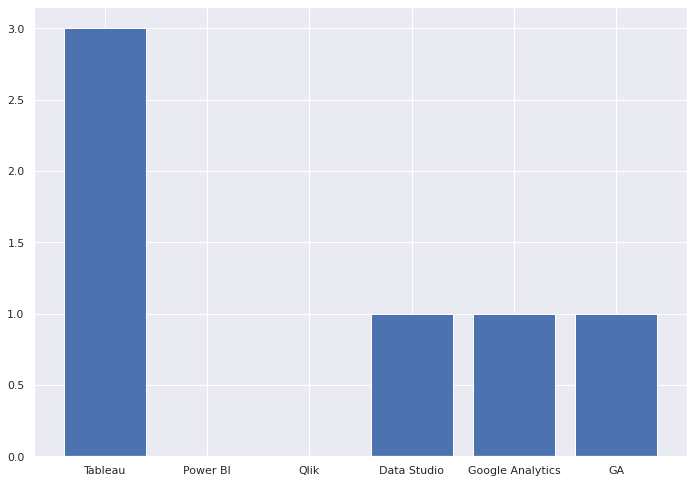

In [ ]:
DV_Tools = ['Tableau','Power BI','Qlik','Data Studio','Google Analytics','GA']

DV = dict((x,0) for x in DV_Tools)
for i in DV:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in DV_Tools:
        DV[i] = x
        
print(DV)
names = list(DV.keys())
values = list(DV.values())
plt.bar(range(len(DV)), values, tick_label=names)
plt.show()

{'SPSS': 1, 'R ': 17, 'Matlab': 0, 'Excel': 0, 'Spreadsheet': 0, 'SAS': 12}


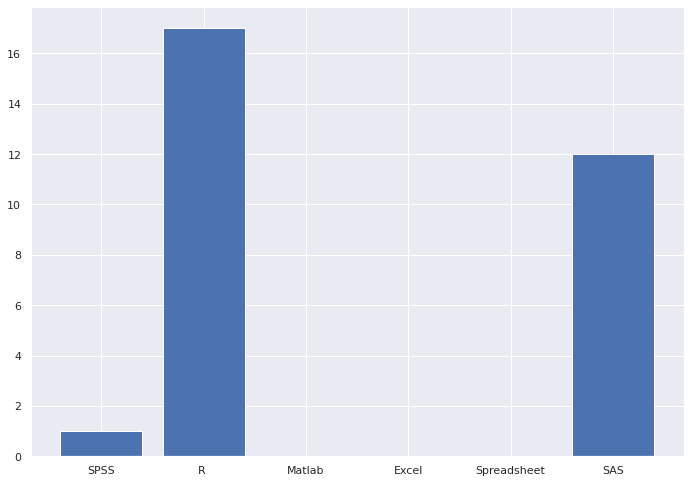

In [ ]:
SA_Tools = ['SPSS','R ','Matlab','Excel','Spreadsheet','SAS']

SA = dict((x,0) for x in SA_Tools)
for i in SA:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in SA_Tools:
        SA[i] = x
        
print(SA)
names = list(SA.keys())
values = list(SA.values())
plt.bar(range(len(SA)), values, tick_label=names)
plt.show()

{'BA': 43, 'BS': 42, 'Bachelor': 6, 'MBA': 0, 'Master': 3, 'PhD': 5}


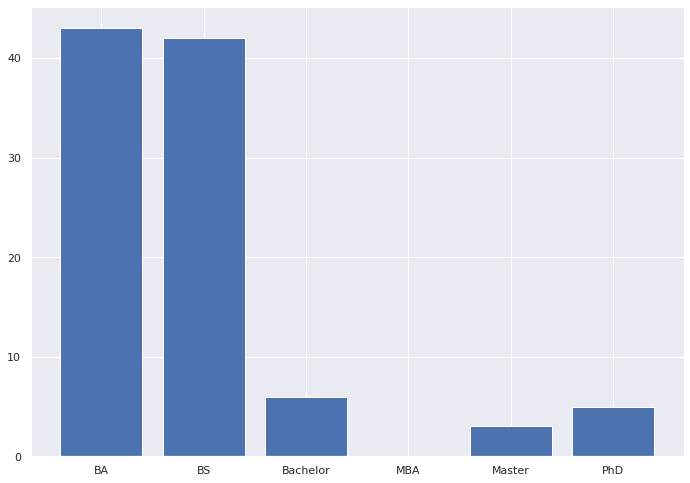

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

{'BA': 14, 'BS': 5, 'Bachelor': 1, 'MBA': 9, 'Master': 13, 'PhD': 11}


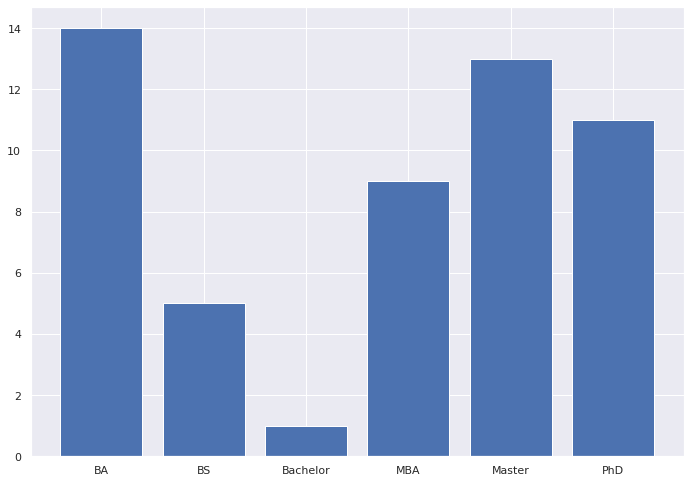

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Minimum work experience')

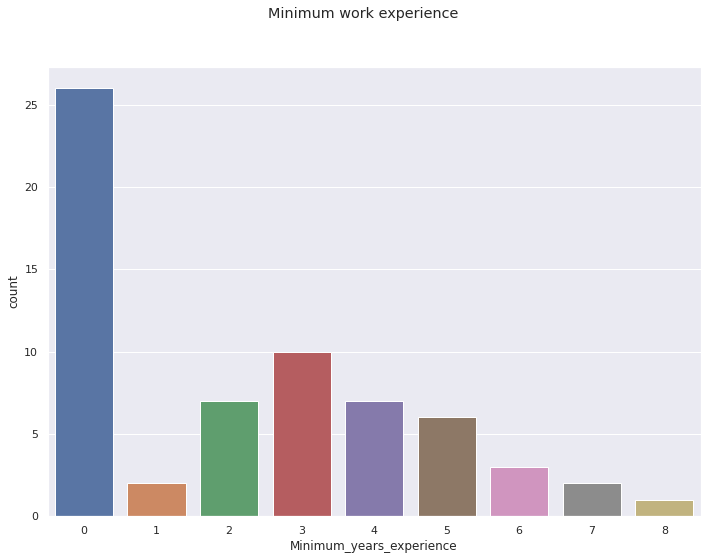

In [ ]:
sns.countplot('Minimum_years_experience',data=df_Analyst)
plt.suptitle('Minimum work experience')

In [ ]:
df_Analyst.Country.value_counts()

 United States     41
 Switzerland        6
 Ireland            5
 United Kingdom     4
Singapore           2
 China              1
 France             1
 Japan              1
 India              1
 Germany            1
 Israel             1
Name: Country, dtype: int64

Developer Based Roles


In [ ]:
df_Developer = df.loc[df.Title.str.contains('Developer').fillna(False)]

In [ ]:
df_Developer.Country.value_counts()

 United States     5
 United Kingdom    3
 Ireland           2
 Japan             2
Name: Country, dtype: int64

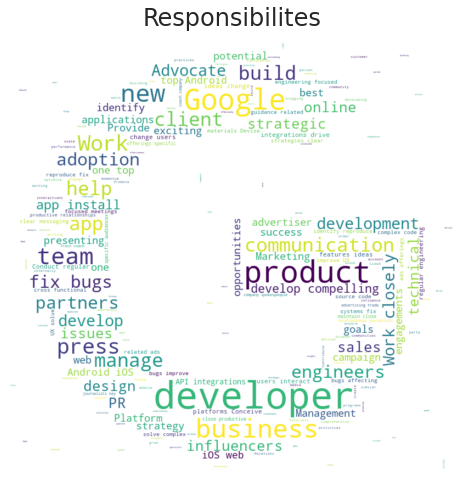

In [ ]:
Res_AN = ' '.join(df_Developer['Responsibilities'].tolist())
sns.set(rc={'figure.figsize':(11.7,8.27)})
wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

{'Java ': 5, 'Javascript': 3, 'Go ': 2, 'Python': 2, 'Kotlin': 3, 'SQL': 0}


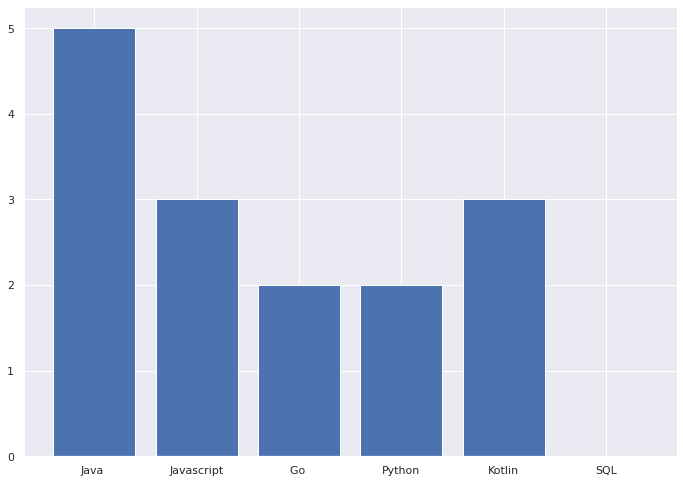

In [ ]:
DataSkill = ['Java ','Javascript','Go ','Python','Kotlin','SQL']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Developer['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
        
print(DataSkills)
names = list(DataSkills.keys())
values = list(DataSkills.values())
plt.bar(range(len(DataSkills)), values, tick_label=names)
plt.show()

{'BA': 1, 'BS': 1, 'Bachelor': 0, 'MBA': 0, 'Master': 1, 'PhD': 0}


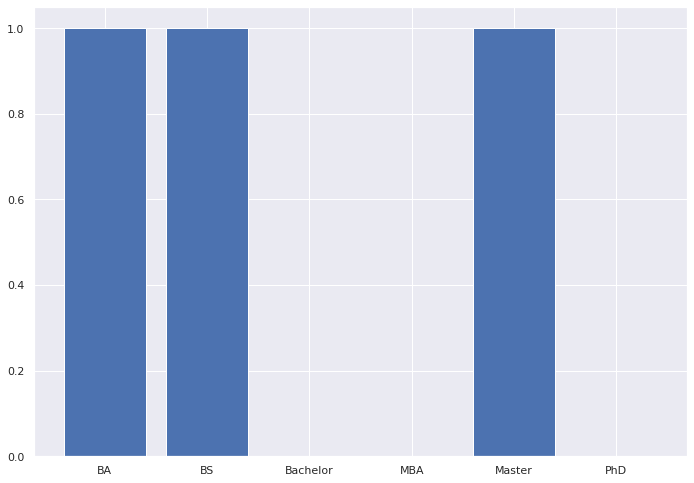

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Developer['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Minimum work experience')

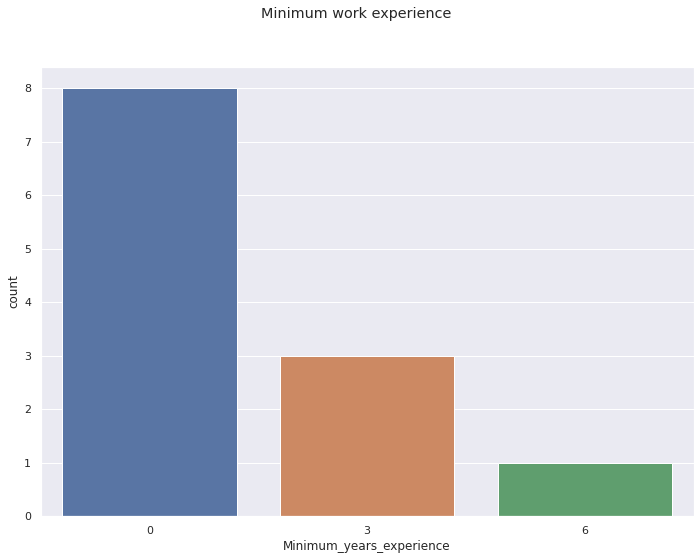

In [ ]:
sns.countplot('Minimum_years_experience',data=df_Developer)
plt.suptitle('Minimum work experience')

Sales Roles


In [ ]:
df_Sales = df.loc[df.Title.str.contains('Sales').fillna(False)]

In [ ]:
df_Sales.Category.value_counts()

Sales & Account Management      83
Sales Operations                12
Technical Solutions             12
Product & Customer Support      11
Partnerships                     8
Business Strategy                3
Program Management               2
Legal & Government Relations     2
Marketing & Communications       1
People Operations                1
Name: Category, dtype: int64

In [ ]:
df_Sales.Country.value_counts()

 United States                  48
 Ireland                        26
 Germany                        11
 Japan                           7
Singapore                        7
 Australia                       6
 Taiwan                          3
 Canada                          3
 United Kingdom                  3
 China                           2
 Turkey                          2
 Brazil                          2
 Poland                          2
 Italy                           1
 Israel                          1
 Sweden                          1
 Norway                          1
 Romania                         1
 Belgium                         1
 Austria                         1
Hong Kong                        1
 Russia                          1
Dubai - United Arab Emirates     1
 Switzerland                     1
 India                           1
 Mexico                          1
Name: Country, dtype: int64

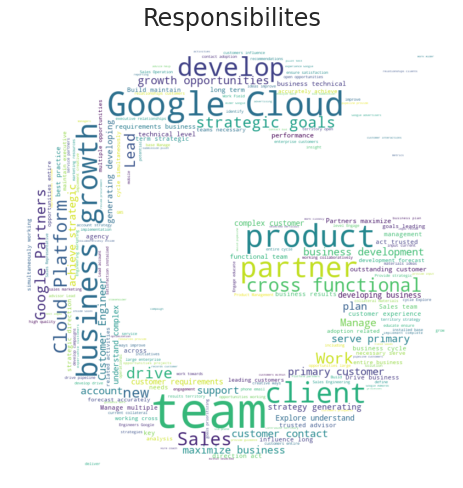

In [ ]:

Res_AN = ' '.join(df_Sales['Responsibilities'].tolist())
sns.set(rc={'figure.figsize':(11.7,8.27)})
wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

{'BA': 104, 'BS': 105, 'Bachelor': 25, 'MBA': 0, 'Master': 1, 'PhD': 1}


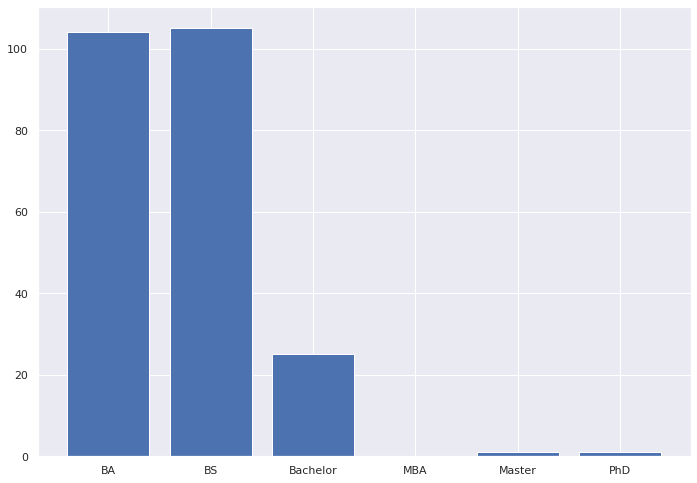

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Sales['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

{'BA': 26, 'BS': 2, 'Bachelor': 1, 'MBA': 24, 'Master': 13, 'PhD': 0}


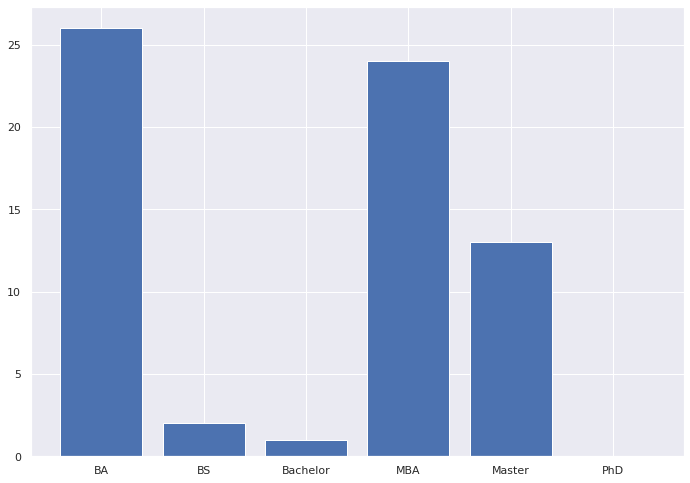

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Sales['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

{'Python': 0, 'Java ': 0, 'C#': 0, 'PHP': 0, 'Javascript': 0, 'Ruby': 0, 'Perl': 0, 'SQL': 6, 'Go ': 0}


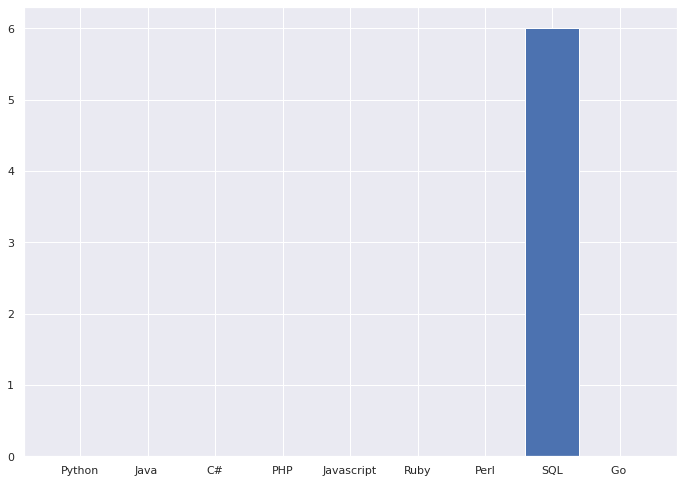

In [ ]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_Sales['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)
names = list(Languages.keys())
values = list(Languages.values())
plt.bar(range(len(Languages)), values, tick_label=names)
plt.show()

{'Python': 2, 'Java ': 2, 'C#': 0, 'PHP': 0, 'Javascript': 0, 'Ruby': 2, 'Perl': 0, 'SQL': 3, 'Go ': 0}


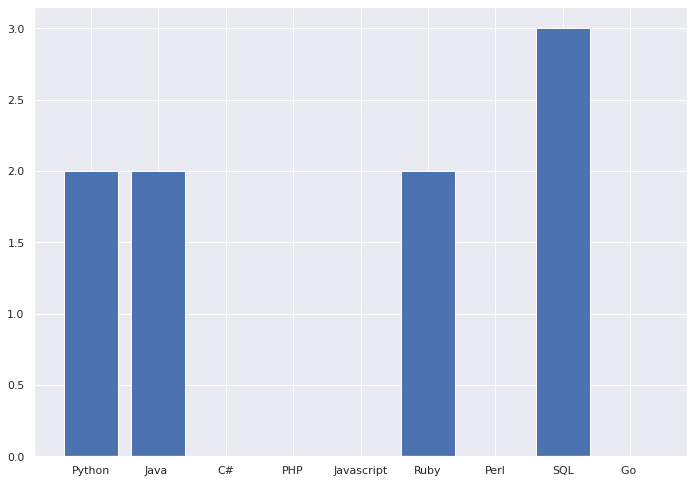

In [ ]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_Sales['Preferred_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)
names = list(Languages.keys())
values = list(Languages.values())
plt.bar(range(len(Languages)), values, tick_label=names)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Minimum work experience')

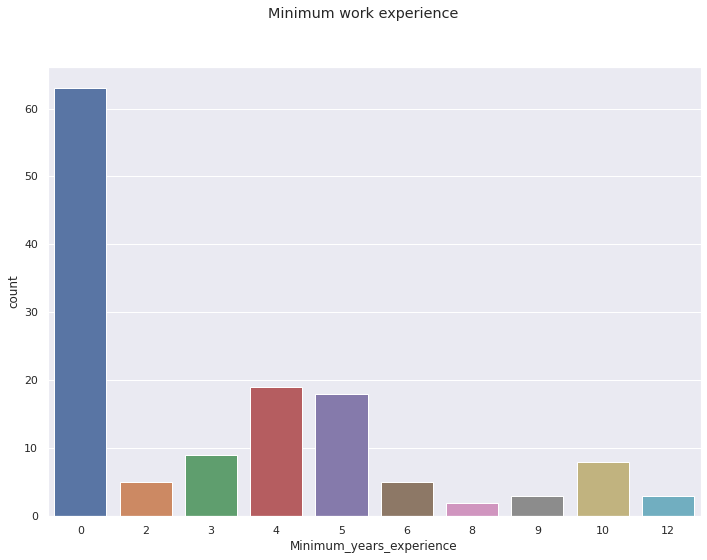

In [ ]:
sns.countplot('Minimum_years_experience',data=df_Sales)
plt.suptitle('Minimum work experience')